<a href="https://colab.research.google.com/github/nguyenvantai102/CS114.L21.KHCL/blob/main/Discovery_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("/content/drive/MyDrive/wecode.csv")
score = pd.read_csv("/content/drive/MyDrive/score_training.csv")

In [28]:
score.head()

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05


In [5]:
data=pd.DataFrame.dropna(data)

In [6]:
len(data['user_id'].unique())

1159

In [8]:
users_id = sorted(list(data['user_id'].unique()))

- Số lượng problem của mỗi user

In [9]:
num_problem_of_user = data.groupby("user_id")["problem_id"].agg(count = "nunique")
num_problem_of_user.head(10)

,count
user_id,
1,2
4,41
5,5
6,88
7,2
11,18
14,7
15,50
20,12


- Số problem mà user đã hoàn thành
  - pre_score = 10000

In [10]:
submit=[]
score=[]
for i in users_id:
  data_problem_solved = data.loc[(data['user_id'] ==i) & (data['pre_score'] ==10000)]
  x=data_problem_solved['pre_score'].sum()/(10000*len(data_problem_solved))
  score.append(x)
  submit.append(len(data_problem_solved))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountere

In [11]:
solved_problem = data[data["pre_score"]==10000].groupby("user_id")["problem_id"].agg(count = "nunique")
solved_problem

,count
user_id,
1,1
4,40
5,3
6,85
11,12
...,...
1860,26
1862,4
1864,28


In [13]:
tmp=pd.DataFrame(list(submit),columns=['Solved'])

- Số lần submit của mỗi user

In [12]:
sub_of_user = data.groupby("user_id")["user_id"].agg(count = "count")
sub_of_user

,count
user_id,
1,2
4,54
5,6
6,130
7,5
...,...
1860,76
1862,12
1864,187


In [14]:
sub_of_user['Solved']=tmp['Solved'].values

In [15]:
sub_of_user.head(10)

,count,Solved
user_id,,
1,2,1
4,54,44
5,6,3
6,130,89
7,5,0
11,50,19
14,22,7
15,101,56
20,13,12


In [16]:
# Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit
sub_of_user['average']=sub_of_user['Solved']/sub_of_user['count'] 

In [17]:
sub_of_user.head(20)

,count,Solved,average
user_id,,,
1,2,1,0.500000
4,54,44,0.814815
5,6,3,0.500000
6,130,89,0.684615
7,5,0,0.000000
11,50,19,0.380000
14,22,7,0.318182
15,101,56,0.554455
20,13,12,0.923077


In [18]:
## Tổng problem đã submit với từng user_id / Tổng số lần submission
sub_of_user['prob/sub']= data.groupby("user_id")["problem_id"].agg(count = "nunique")/data.groupby("user_id")["user_id"].agg(count = "count")

In [19]:
sub_of_user.head(20)

,count,Solved,average,prob/sub
user_id,,,,
1,2,1,0.500000,1.000000
4,54,44,0.814815,0.759259
5,6,3,0.500000,0.833333
6,130,89,0.684615,0.676923
7,5,0,0.000000,0.400000
11,50,19,0.380000,0.360000
14,22,7,0.318182,0.318182
15,101,56,0.554455,0.495050
20,13,12,0.923077,0.923077


In [20]:
# số problem user hoàn thành / số problem của mỗi user
data_submit_true = solved_problem / data.groupby("user_id")["problem_id"].agg(count = "nunique")

In [21]:
sub_of_user['Average_RightSubmit']=data_submit_true

In [23]:
sum_pre=data[data['is_final']==1].groupby("user_id")["pre_score"].agg(count = "sum")
sum_pre

,count
user_id,
1,10000
4,370000
5,30000
6,850000
7,9209
...,...
1860,329665
1862,40000
1864,439741


In [24]:
sub_of_user['Sum_Pre']=sum_pre

In [29]:
# Thay header cho trùng với dữ liệu wecode
score = score.get(['id','CK'])

In [33]:
merged_left = pd.merge(left=sub_of_user, right=score, how='left', left_on='user_id', right_on='id')

In [34]:
merged_left = merged_left.drop(['id'], axis=1)
merged_left.head(20)

,count,Solved,average,prob/sub,Average_RightSubmit,Sum_Pre,CK
0,2,1,0.500000,1.000000,0.500000,10000.0,NaN
1,54,44,0.814815,0.759259,0.975610,370000.0,NaN
2,6,3,0.500000,0.833333,0.600000,30000.0,NaN
3,130,89,0.684615,0.676923,0.965909,850000.0,NaN
4,5,0,0.000000,0.400000,NaN,9209.0,NaN
5,50,19,0.380000,0.360000,0.666667,100316.0,NaN
6,22,7,0.318182,0.318182,0.857143,68000.0,NaN
7,101,56,0.554455,0.495050,0.900000,458666.0,NaN
8,13,12,0.923077,0.923077,1.000000,120000.0,NaN
9,164,80,0.487805,0.475610,0.935897,750299.0,9.5


In [36]:
data_test = merged_left.loc[(merged_left.isnull().sum(1) != 1)]
data_test = data_test.loc[data_test['CK'] != "\xa0"]
data_test = data_test.head(800)
pd.set_option('display.max_rows', data.shape[0]+1)
data_test

,count,Solved,average,prob/sub,Average_RightSubmit,Sum_Pre,CK
4,5,0,0.000000,0.400000,NaN,9209.0,NaN
9,164,80,0.487805,0.475610,0.935897,750299.0,9.5
10,13,4,0.307692,0.384615,0.600000,39000.0,10
11,199,75,0.376884,0.402010,0.900000,762760.0,8.5
13,218,81,0.371560,0.385321,0.964286,822888.0,6.5
14,297,152,0.511785,0.494949,0.959184,1477000.0,4.5
15,312,100,0.320513,0.326923,0.911765,979712.0,7.5
16,664,227,0.341867,0.287651,0.973822,2111388.0,8
17,110,64,0.581818,0.645455,0.873239,636888.0,8
18,324,192,0.592593,0.558642,0.988950,1925142.0,7.5


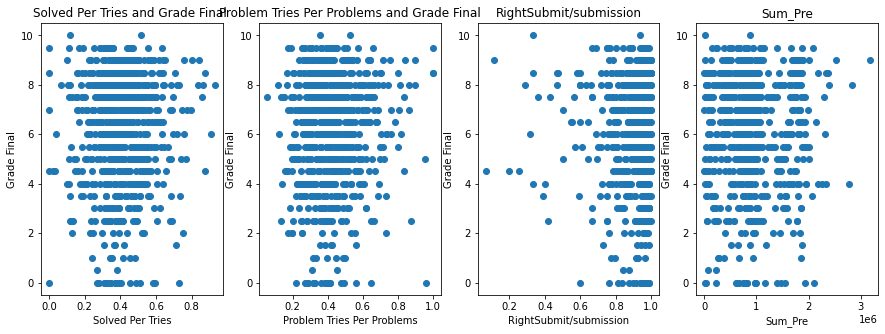

In [46]:
import matplotlib.pyplot as plt
fig, (axs1, axs2, axs3, axs4 ) = plt.subplots(1,4, figsize = (15,5))
axs1.scatter(x = data_test['average'].astype(float), y = data_test['CK'].sort_values().astype(float))


axs1.set_title("Solved Per Tries and Grade Final ")
axs1.set(xlabel='Solved Per Tries', ylabel='Grade Final')


axs2.scatter(x = data_test['prob/sub'].astype(float), y = data_test['CK'].sort_values().astype(float))


axs2.set_title("Problem Tries Per Problems and Grade Final")
axs2.set(xlabel='Problem Tries Per Problems', ylabel='Grade Final')

axs3.scatter(x = data_test['Average_RightSubmit'].astype(float), y = data_test['CK'].sort_values().astype(float))


axs3.set_title("RightSubmit/submission")
axs3.set(xlabel='RightSubmit/submission', ylabel='Grade Final')

axs4.scatter(x = data_test['Sum_Pre'].astype(float), y = data_test['CK'].sort_values().astype(float))


axs4.set_title("Sum_Pre")
axs4.set(xlabel='Sum_Pre', ylabel='Grade Final')
plt.show()